In [2]:
import pandas as pd

df = pd.read_csv("features_extracted.csv")  

In [3]:
df = df.drop(columns=["epoch", "session"], errors='ignore')


In [4]:
df = df.dropna()

In [5]:
X = df.drop(columns=['label'])  # Features
y = df['label']  # Target cognitive state

from sklearn.preprocessing import LabelEncoder

# Assuming y is your target column
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [8]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grids = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 6]}
}

best_models = {}
for name, model in models.items():
    print(f"Tuning {name}")
    grid = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy', n_jobs=-1)
    grid.fit(X_scaled, y_encoded)
    best_models[name] = grid.best_estimator_

Tuning SVM
Tuning RandomForest
Tuning XGBoost


C:\Users\ssr17\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:57:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, stratify=y, test_size=0.2, random_state=42)
predictions = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    print(f"---- {name} ----")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


---- SVM ----
[[156   8   0   0   0   0   0]
 [  9 178   5   1   3   0   0]
 [  7   5  36   1   1   0   0]
 [  7   5   0  17   2   0   0]
 [  9   3   0   1  21   0   0]
 [  0   0   0   0   0  33   0]
 [  0   0   0   0   0   0  29]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       164
           1       0.89      0.91      0.90       196
           2       0.88      0.72      0.79        50
           3       0.85      0.55      0.67        31
           4       0.78      0.62      0.69        34
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        29

    accuracy                           0.88       537
   macro avg       0.89      0.82      0.85       537
weighted avg       0.88      0.88      0.87       537

---- RandomForest ----
[[124  38   2   0   0   0   0]
 [ 11 182   3   0   0   0   0]
 [ 15  13  20   0   1   0   1]
 [ 14  17   0   0   0   0   0]
 [ 11  19   0   0   4   

C:\Users\ssr17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ssr17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ssr17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ssr17\anaconda3\Lib\site-packag

---- XGBoost ----
[[150  13   1   0   0   0   0]
 [  7 188   1   0   0   0   0]
 [ 11   3  30   2   3   0   1]
 [ 10   7   1   6   7   0   0]
 [  7   9   1   0  17   0   0]
 [  0   0   0   0   0  33   0]
 [  0   0   0   0   0   0  29]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       164
           1       0.85      0.96      0.90       196
           2       0.88      0.60      0.71        50
           3       0.75      0.19      0.31        31
           4       0.63      0.50      0.56        34
           5       1.00      1.00      1.00        33
           6       0.97      1.00      0.98        29

    accuracy                           0.84       537
   macro avg       0.84      0.74      0.76       537
weighted avg       0.84      0.84      0.83       537



In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import pandas as pd


In [55]:
def plot_conf_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.tight_layout()
    plt.show()

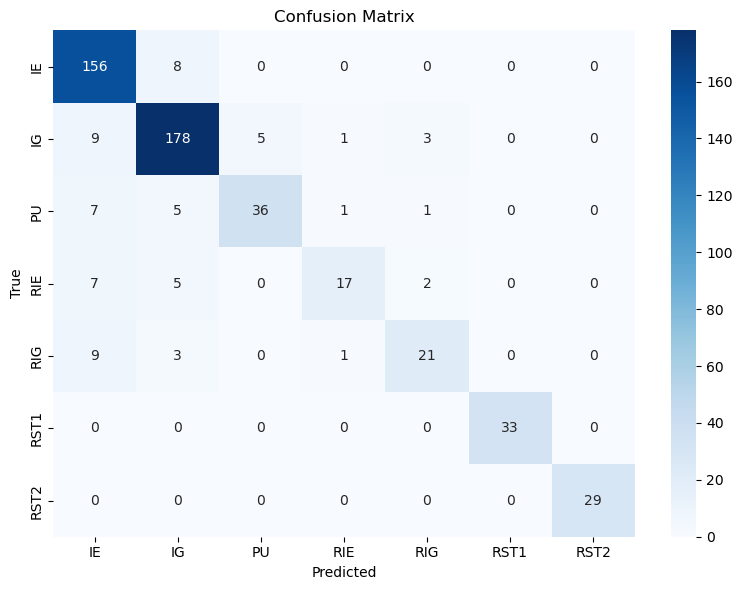

In [57]:
y_test_str = le.inverse_transform(y_test)
y_pred_str = le.inverse_transform(y_pred)

plot_conf_matrix(y_test_str, y_pred_str, labels=le.classes_, title="Confusion Matrix")

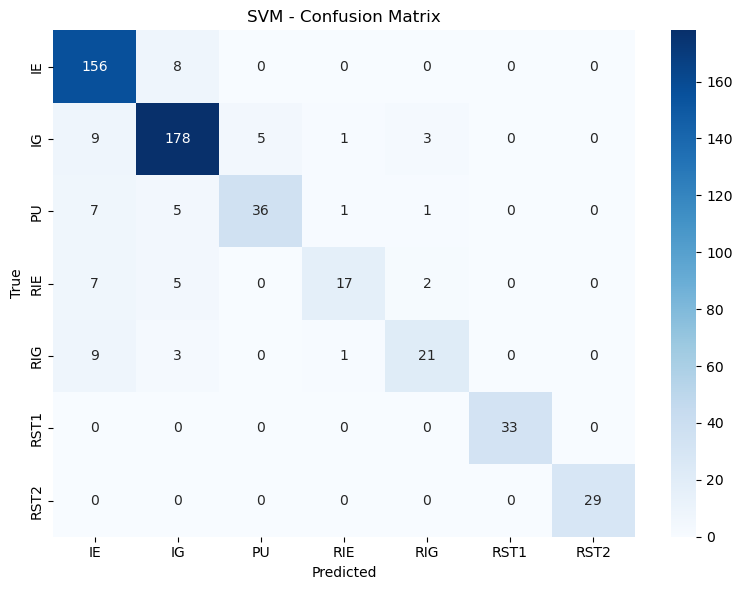

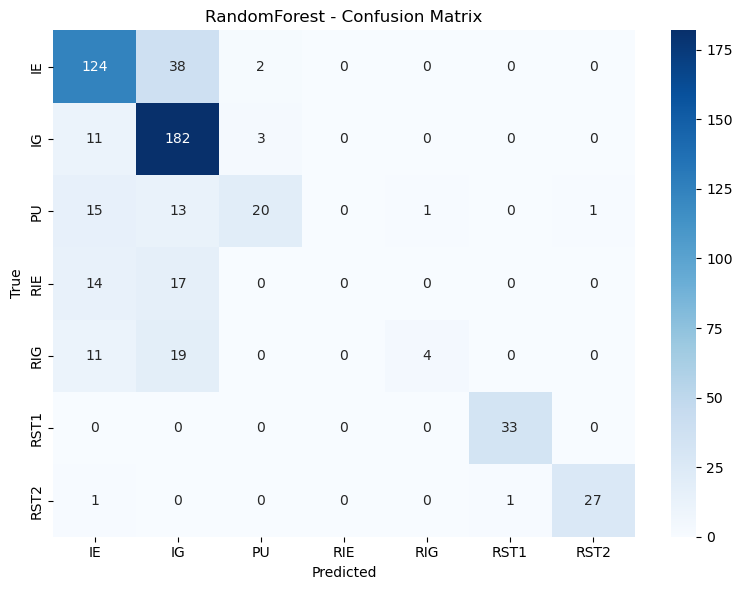

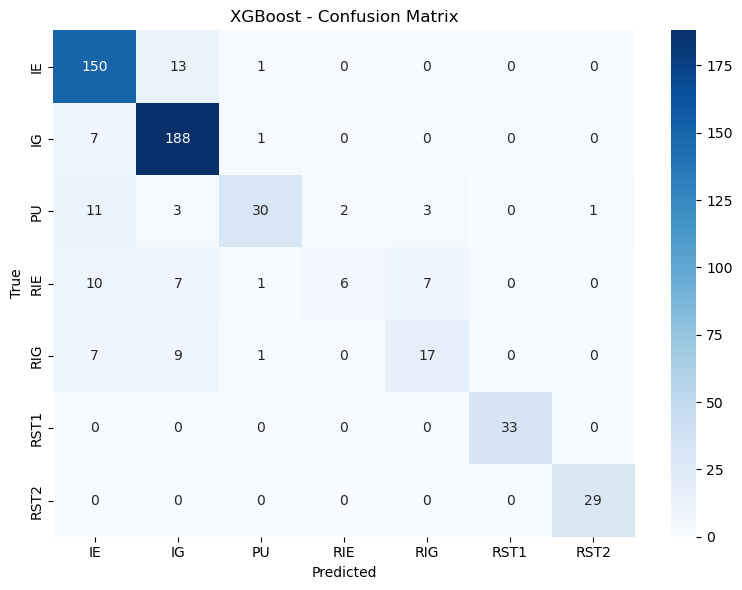

In [67]:
labels_str = le.classes_
y_test_str = le.inverse_transform(y_test)
y_pred_str = {name: le.inverse_transform(pred) for name, pred in predictions.items()}

for name, y_pred in y_pred_str.items():
    plot_conf_matrix(y_test_str, y_pred, labels=labels_str, title=f"{name} - Confusion Matrix")

In [47]:
import joblib

# Save the trained models dictionary
joblib.dump(best_models, "baseline_models.pkl")
print("Models saved to baseline_models.pkl")

Models saved to baseline_models.pkl


In [49]:
from sklearn.metrics import classification_report
import numpy as np

# Open a Markdown file to write
with open("model_eval_report.md", "w") as f:
    f.write("# Baseline Model Evaluation Report\n\n")
    
    for name, model in best_models.items():
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, target_names=le.classes_)
        f.write(f"## {name} Classifier\n\n")
        f.write("```\n")
        f.write(report)
        f.write("```\n\n")
        
print("Evaluation report saved to model_eval_report.md")

Evaluation report saved to model_eval_report.md


C:\Users\ssr17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ssr17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ssr17\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
